In [11]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../pyscripts/')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_attr = pd.read_csv('../data/attributes.csv')
df_pro_desc = pd.read_csv('../data/product_descriptions.csv')

In [13]:
num_train = df_train.shape[0]

In [14]:
df_train.head()

id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   

          search_term  relevance  
0       angle bracket       3.00  
1           l bracket       2.50  
2           deck over       3.00  
3    rain shower head       2.33  
4  shower only faucet       2.67

In [15]:
df_test.head()

id  product_uid                      product_title  \
0   1       100001  Simpson Strong-Tie 12-Gauge Angle   
1   4       100001  Simpson Strong-Tie 12-Gauge Angle   
2   5       100001  Simpson Strong-Tie 12-Gauge Angle   
3   6       100001  Simpson Strong-Tie 12-Gauge Angle   
4   7       100001  Simpson Strong-Tie 12-Gauge Angle   

                 search_term  
0          90 degree bracket  
1           metal l brackets  
2           simpson sku able  
3       simpson strong  ties  
4  simpson strong tie hcc668

In [16]:
df_attr.head()

product_uid      name                                              value
0       100001  Bullet01  Versatile connector for various 90° connection...
1       100001  Bullet02  Stronger than angled nailing or screw fastenin...
2       100001  Bullet03  Help ensure joints are consistently straight a...
3       100001  Bullet04              Dimensions: 3 in. x 3 in. x 1-1/2 in.
4       100001  Bullet05                           Made from 12-Gauge steel

In [17]:
df_pro_desc.head()

product_uid                                product_description
0       100001  Not only do angles make joints stronger, they ...
1       100002  BEHR Premium Textured DECKOVER is an innovativ...
2       100003  Classic architecture meets contemporary design...
3       100004  The Grape Solar 265-Watt Polycrystalline PV So...
4       100005  Update your bathroom with the Delta Vero Singl...

In [18]:
df_train.describe()

id    product_uid     relevance
count   74067.000000   74067.000000  74067.000000
mean   112385.709223  142331.911553      2.381634
std     64016.573650   30770.774864      0.533984
min         2.000000  100001.000000      1.000000
25%     57163.500000  115128.500000      2.000000
50%    113228.000000  137334.000000      2.330000
75%    168275.500000  166883.500000      3.000000
max    221473.000000  206650.000000      3.000000

In [19]:
# Merge both training and testing dataframes to do preprocessing on both
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

In [20]:
# Merge (Left outer join) product description
df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

In [21]:
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

In [22]:
df_all['product_title'] = df_all['product_title'].map(lambda x:x.lower())

In [23]:
df_all.head()

id                                      product_title  product_uid  \
0   2                  simpson strong-tie 12-gauge angle       100001   
1   3                  simpson strong-tie 12-gauge angle       100001   
2   9  behr premium textured deckover 1-gal. #sc-141 ...       100002   
3  16  delta vero 1-handle shower only faucet trim ki...       100005   
4  17  delta vero 1-handle shower only faucet trim ki...       100005   

   relevance         search_term  \
0       3.00       angle bracket   
1       2.50           l bracket   
2       3.00           deck over   
3       2.33    rain shower head   
4       2.67  shower only faucet   

                                 product_description  len_of_query  
0  Not only do angles make joints stronger, they ...             2  
1  Not only do angles make joints stronger, they ...             2  
2  BEHR Premium Textured DECKOVER is an innovativ...             2  
3  Update your bathroom with the Delta Vero Singl...             3  
4  Update your bathroom with the Delta Vero Singl...             3

In [24]:
df_all[:num_train].shape

(74067, 7)

In [25]:
df_qlen_search = pd.DataFrame(df_all[:num_train],columns=['relevance', 'len_of_query'])

In [26]:
df_qlen_search

relevance  len_of_query
0           3.00             2
1           2.50             2
2           3.00             2
3           2.33             3
4           2.67             3
5           3.00             2
6           2.67             3
7           3.00             1
8           2.67             2
9           3.00             2
10          2.67             2
11          3.00             5
12          3.00             2
13          2.00             2
14          2.67             6
15          2.67             1
16          3.00             2
17          1.00             2
18          1.67             4
19          2.33             2
20          2.33             2
21          1.33             4
22          2.67             3
23          2.33             2
24          1.33             2
25          2.33             3
26          2.33             3
27          2.00             2
28          2.33             2
29          2.67             3
...          ...           ...
74037       1.67             5
74038       1.33             4
74039       2.33             3
74040       2.33             3
74041       2.67             4
74042       1.67             4
74043       3.00             5
74044       2.67             1
74045       1.33             4
74046       2.00             1
74047       1.67             4
74048       2.00             8
74049       1.00             5
74050       2.33             2
74051       2.00             4
74052       2.33             3
74053       2.33             4
74054       2.00             4
74055       1.67             4
74056       2.00             3
74057       2.67             3
74058       3.00             3
74059       3.00             5
74060       2.00             2
74061       3.00             6
74062       1.00             3
74063       3.00             3
74064       2.33             7
74065       3.00             3
74066       2.33             5

[74067 rows x 2 columns]

In [27]:
df_qlen_search = df_qlen_search.set_index(['len_of_query'])

In [28]:
df_qlen_search

relevance
len_of_query           
2                  3.00
2                  2.50
2                  3.00
3                  2.33
3                  2.67
2                  3.00
3                  2.67
1                  3.00
2                  2.67
2                  3.00
2                  2.67
5                  3.00
2                  3.00
2                  2.00
6                  2.67
1                  2.67
2                  3.00
2                  1.00
4                  1.67
2                  2.33
2                  2.33
4                  1.33
3                  2.67
2                  2.33
2                  1.33
3                  2.33
3                  2.33
2                  2.00
2                  2.33
3                  2.67
...                 ...
5                  1.67
4                  1.33
3                  2.33
3                  2.33
4                  2.67
4                  1.67
5                  3.00
1                  2.67
4                  1.33
1                  2.00
4                  1.67
8                  2.00
5                  1.00
2                  2.33
4                  2.00
3                  2.33
4                  2.33
4                  2.00
4                  1.67
3                  2.00
3                  2.67
3                  3.00
5                  3.00
2                  2.00
6                  3.00
3                  1.00
3                  3.00
7                  2.33
3                  3.00
5                  2.33

[74067 rows x 1 columns]

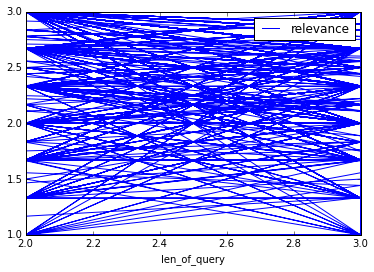

In [29]:
df_qlen_search[:1000].plot(color='Blue')

In [30]:
df_train['relevance'].value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
dtype: int64